In [1]:
# ================================================================
# Bachelor Thesis — Fairness in Toxic Comment Classification
# ---------------------------------------------------------------
# Notebook: print_final_thesis_plots.ipynb
# Author: Philipp Stocker
# Created: 28.12.2025
# Purpose: This notebook is used to create and print the final plots
#          for the bachelor thesis. Additionally, it was used to
#          calculate the final toxicity distributions for the final thesis.
# ================================================================

# --- Basic setup ---
import os
import sys
import warnings
warnings.filterwarnings("ignore")  # keep output clean for reports

# Automatically add project root to path so src/ modules are importable
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

# --- Standard imports ---
import pandas as pd
import matplotlib.pyplot as plt

from src.visualization import plot_grouped_bars_by_model

from src.metrics import create_result_df

import src.data_preprocessing_and_preparation as data_prep

# --- "Global variables" ---
DATA_RAW = os.path.join(project_root, "data", "raw")
DATA_PROCESSED = os.path.join(project_root, "data", "processed")

IDENTITY_COLUMNS = ["male", "female", "heterosexual", "homosexual_gay_or_lesbian", "bisexual", "transgender", "other_gender", "other_sexual_orientation"]

print("✅ Environment ready")


✅ Environment ready


PLOT GENERATION

Create dataframes including all necessary information for plots:

In [2]:
#id_cols = ["homosexual_gay_or_lesbian", "transgender", "bisexual", "female", "male", "heterosexual"]
id_cols = ["homosexual_gay_or_lesbian", "transgender", "bisexual"]

gap_fpr_results_df = create_result_df(metric="gap_fpr", subgroups=id_cols)
sg_fpr_results_df = create_result_df(metric="sg_fpr", subgroups=id_cols)
sg_fnr_results_df = create_result_df(metric="sg_fnr", subgroups=id_cols)

In [ ]:
# Print results for quick cross checking
print(gap_fpr_results_df)

                     subgroup   gap_fpr     model
1                    bisexual  0.184712  baseline
2   homosexual_gay_or_lesbian  0.235723  baseline
3                 transgender  0.154783  baseline
9   homosexual_gay_or_lesbian  0.150707       cda
10                   bisexual  0.185307       cda
11                transgender  0.125157       cda
17                   bisexual  0.100048       fcl
18  homosexual_gay_or_lesbian  0.105140       fcl
21                transgender  0.030610       fcl
25                   bisexual -0.005059        eo
26  homosexual_gay_or_lesbian  0.000160        eo
27                transgender  0.013824        eo


Plot FPR gap by subgroup and model:

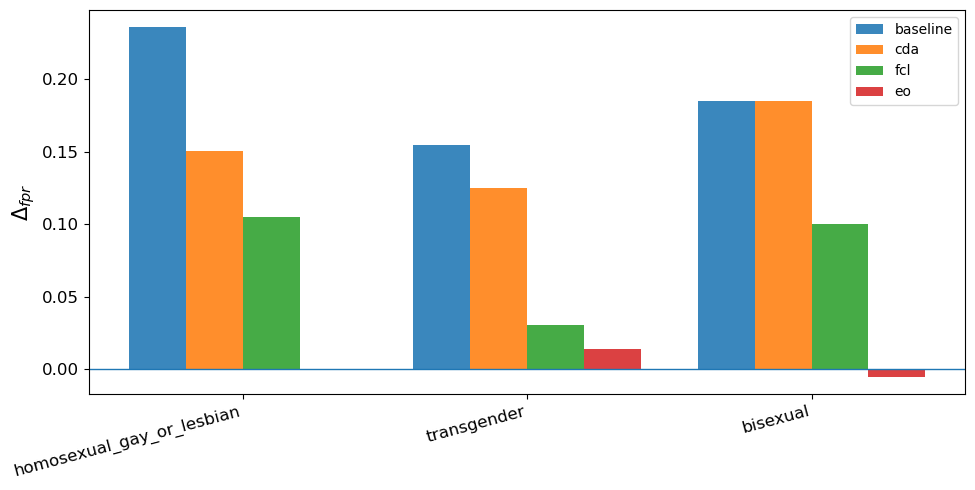

In [15]:
fig, ax = plot_grouped_bars_by_model(
    result_df=gap_fpr_results_df,
    metric="gap_fpr",
    subgroups=id_cols,
    ylabel=r"$\Delta_{fpr}$",
    rotate_xticks=15,
    xtick_fontsize=12,
    ylabel_fontsize=15,
    ytick_fontsize=12,
    alpha=0.88)

plt.show()

Plot sg_fpr by subgroup and model:

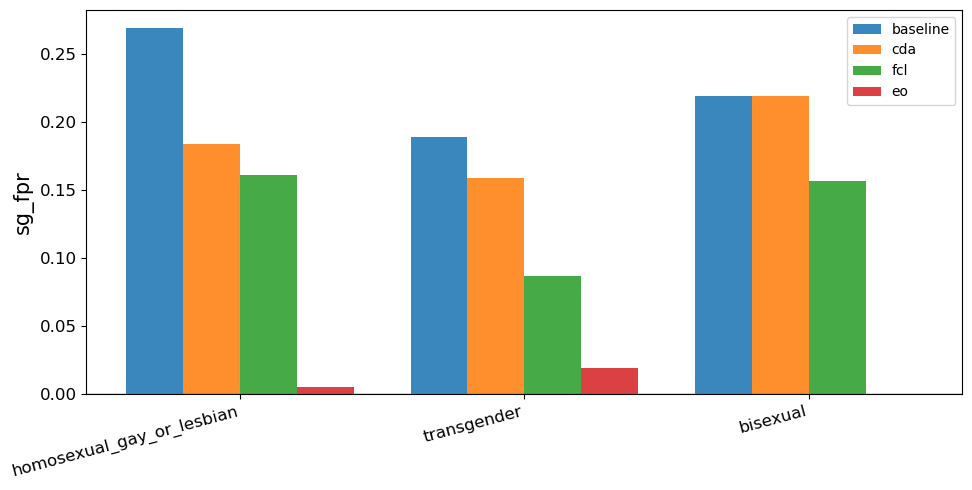

In [12]:
fig, ax = plot_grouped_bars_by_model(
    result_df=sg_fpr_results_df,
    metric="sg_fpr",
    subgroups=id_cols,
    rotate_xticks=15,
    xtick_fontsize=12,
    ylabel_fontsize=15,
    ytick_fontsize=12,
    alpha=0.88)

plt.show()

Plot sg_fnr by subgroup and model:

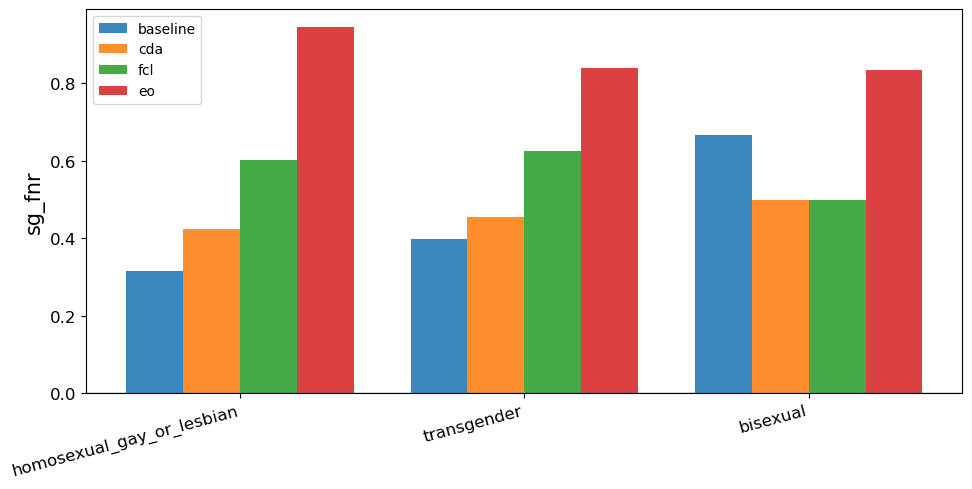

In [14]:
fig, ax = plot_grouped_bars_by_model(
    result_df=sg_fnr_results_df,
    metric="sg_fnr",
    subgroups=id_cols,
    rotate_xticks=15,
    xtick_fontsize=12,
    ylabel_fontsize=15,
    ytick_fontsize=12,
    alpha=0.88)

plt.show()

Calculate values for toxicity distribution tables:

In [7]:
#load processed dataframes
test_df = pd.read_parquet(os.path.join(DATA_PROCESSED, "test_processed.parquet"))
df = pd.read_csv(os.path.join(DATA_RAW, "train.csv"))

In [ ]:
# Binarize target labels for toxicity
df = data_prep.binarize_labels(df, target_col="target", new_col_name="labelled_as_toxic", threshold=0.5)

In [ ]:
# Calculate toxicity distribution in test set
n_pos = test_df['labelled_as_toxic'].sum()
n_neg = len(test_df) - n_pos

print(f"Number of toxic comments in test set: {n_pos}")
print(f"Number of non-toxic comments in test set: {n_neg}")

Number of toxic comments in test set: 21651
Number of non-toxic comments in test set: 249080


In [ ]:
# Calculate toxicity distribution in overall dataset
n_pos_overall = df['labelled_as_toxic'].sum()
n_neg_overall = len(df) - n_pos_overall
n_pos_rel_overall = n_pos_overall / len(df)
n_neg_rel_overall = n_neg_overall / len(df)

print(f"Number of toxic comments in overall dataset: {n_pos_overall}")
print(f"Number of non-toxic comments in overall dataset: {n_neg_overall}")
print(f"Relative frequency of toxic comments in overall dataset: {n_pos_rel_overall:.4f}")
print(f"Relative frequency of non-toxic comments in overall dataset: {n_neg_rel_overall:.4f}")
print(f"Total number of comments in overall dataset: {len(df)}")

Number of toxic comments in overall dataset: 144334
Number of non-toxic comments in overall dataset: 1660540
Relative frequency of toxic comments in overall dataset: 0.0800
Relative frequency of non-toxic comments in overall dataset: 0.9200
Total number of comments in overall dataset: 1804874
